In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

In [2]:
with open("../dataset/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')

In [4]:
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']


In [5]:
print(len(columns))

42


In [6]:
with open("../dataset/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l



In [7]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [8]:
path = "../dataset/kddcup.data.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        215      45076     0   
1         0           tcp    http   SF        162       4528     0   
2         0           tcp    http   SF        236       1228     0   
3         0           tcp    http   SF        233       2032     0   
4         0           tcp    http   SF        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     0.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.00   
1                     0.0                         1.00   
2                     0.0                         0.50   
3                     0.0                         0.33   
4                     0.0                         0.25   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    target  Attack Type  
0  normal.       normal  
1  normal.       normal  
2  normal.       normal  
3  normal.       normal  
4  normal.       normal  

[5 rows x 43 columns]

In [9]:
df.shape

(4898431, 43)

In [10]:
df['target'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: target, dtype: int64

In [11]:
df['Attack Type'].value_counts()

dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: Attack Type, dtype: int64

In [12]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [13]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [15]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

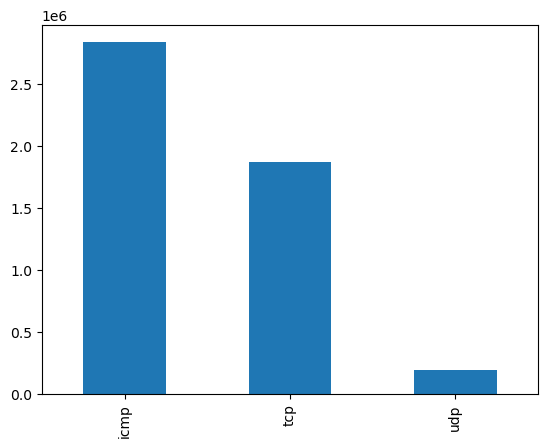

In [16]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

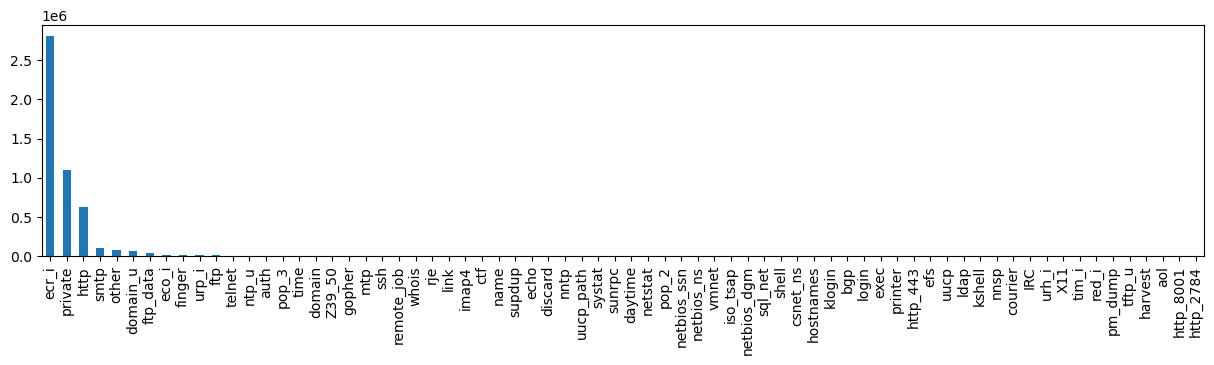

In [17]:
plt.figure(figsize=(15,3))
bar_graph('service')

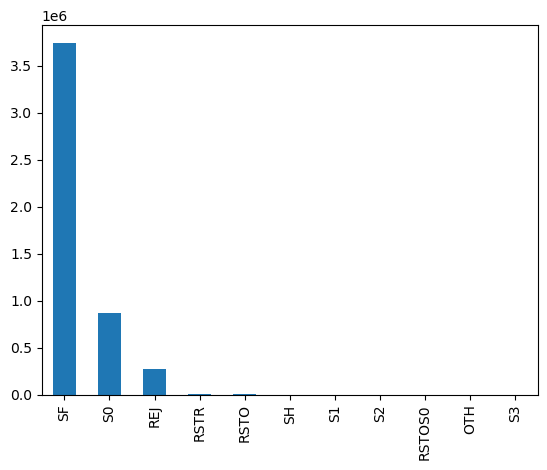

In [18]:
bar_graph('flag')

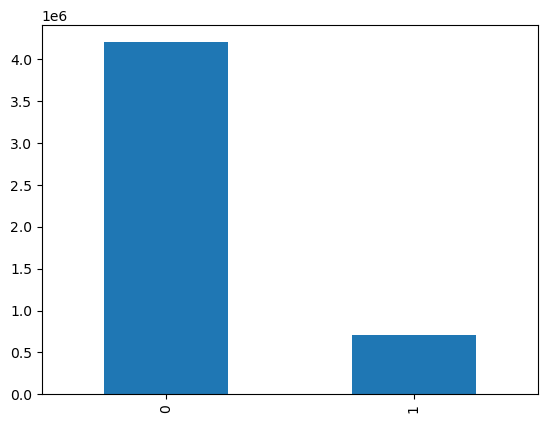

In [19]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

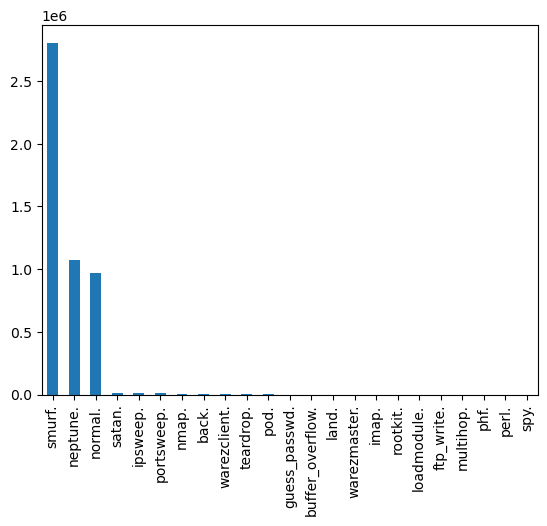

In [20]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

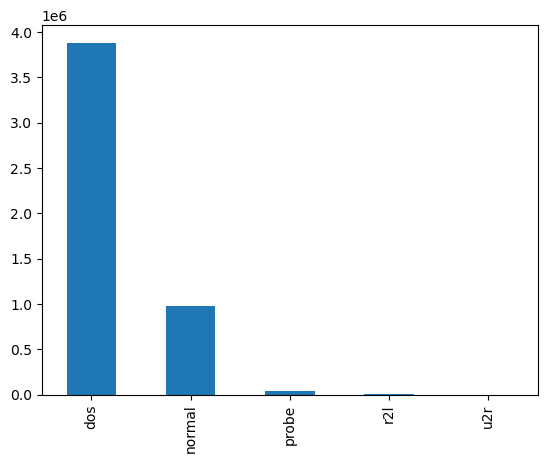

In [21]:
bar_graph('Attack Type')

In [22]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

C:\Users\abish\AppData\Local\Temp\ipykernel_10292\4162482413.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
C:\Users\abish\AppData\Local\Temp\ipykernel_10292\4162482413.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


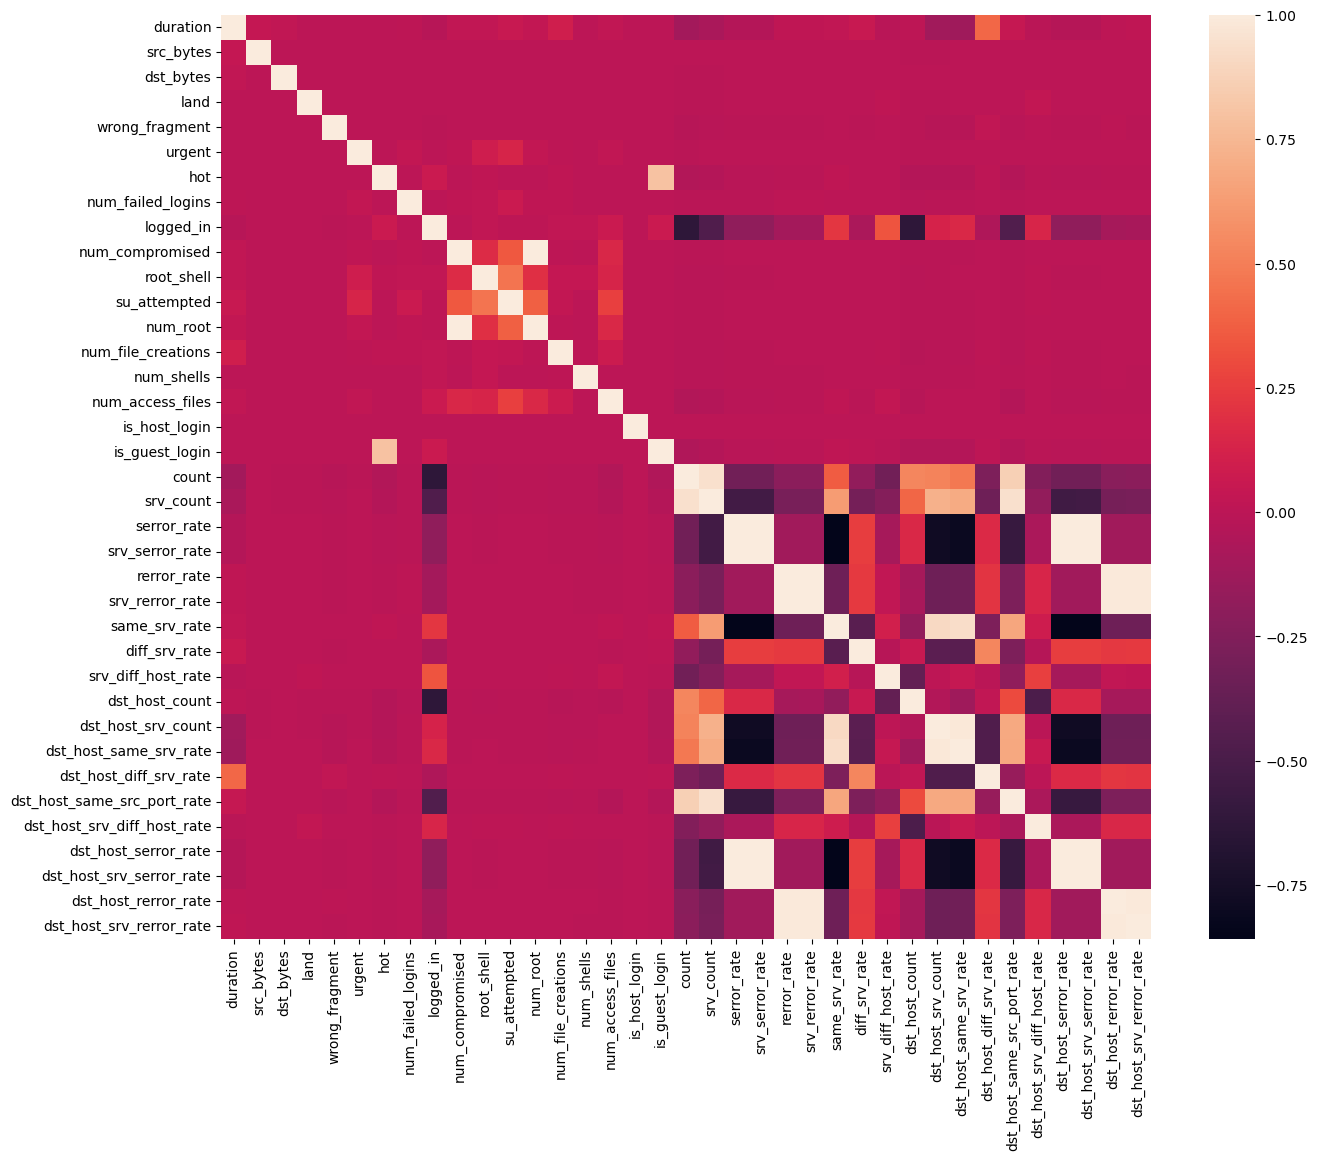

In [23]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [24]:
df['num_root'].corr(df['num_compromised'])

0.9975798933487737

In [25]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9986924138664222

In [26]:
df['srv_count'].corr(df['count'])

0.9433902218808042

In [27]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9953719458068703

In [28]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9788464524225914

In [29]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.998285955975919

In [30]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9869790678086942

In [31]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9316213679073936

In [32]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.9075289446662882

In [33]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9473596471554561

In [34]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9990059376728406

In [35]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9979417182527545

In [36]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9982509415923287

In [37]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993917300385466

In [38]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9897555886509829

In [39]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9855530624565976

In [40]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9859781723139902

In [41]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9879088754808538

In [42]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [43]:
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        215      45076     0   
1         0           tcp    http   SF        162       4528     0   
2         0           tcp    http   SF        236       1228     0   
3         0           tcp    http   SF        233       2032     0   
4         0           tcp    http   SF        239        486     0   

   wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0               0       0    0  ...            1.0            0.0   
1               0       0    0  ...            1.0            0.0   
2               0       0    0  ...            1.0            0.0   
3               0       0    0  ...            1.0            0.0   
4               0       0    0  ...            1.0            0.0   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                 0.0               0                   0   
1                 0.0               1                   1   
2                 0.0               2                   2   
3                 0.0               3                   3   
4                 0.0               4                   4   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.00   
1                     0.0                         1.00   
2                     0.0                         0.50   
3                     0.0                         0.33   
4                     0.0                         0.25   

   dst_host_srv_diff_host_rate   target  Attack Type  
0                          0.0  normal.       normal  
1                          0.0  normal.       normal  
2                          0.0  normal.       normal  
3                          0.0  normal.       normal  
4                          0.0  normal.       normal  

[5 rows x 34 columns]

In [44]:
df.shape

(4898431, 34)

In [45]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [46]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

C:\Users\abish\AppData\Local\Temp\ipykernel_10292\1261043509.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


is_host_login                       0.000639
land                                0.002391
urgent                              0.007215
num_failed_logins                   0.007299
su_attempted                        0.008082
root_shell                          0.008257
num_shells                          0.008738
is_guest_login                      0.028887
num_access_files                    0.035510
dst_host_srv_diff_host_rate         0.041260
wrong_fragment                      0.042854
diff_srv_rate                       0.082715
dst_host_diff_srv_rate              0.108543
num_file_creations                  0.124186
srv_diff_host_rate                  0.140560
rerror_rate                         0.232253
logged_in                           0.350612
serror_rate                         0.381876
same_srv_rate                       0.389296
hot                                 0.468978
dst_host_same_src_port_rate         0.480988
num_compromised                     3.856481
dst_host_c

FEATURE MAPPING

In [47]:
df['protocol_type'].value_counts()

icmp    2833545
tcp     1870598
udp      194288
Name: protocol_type, dtype: int64

In [48]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [49]:
df['flag'].value_counts()

SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: flag, dtype: int64

In [50]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [51]:
df.head()

duration  protocol_type service  flag  src_bytes  dst_bytes  land  \
0         0              1    http     0        215      45076     0   
1         0              1    http     0        162       4528     0   
2         0              1    http     0        236       1228     0   
3         0              1    http     0        233       2032     0   
4         0              1    http     0        239        486     0   

   wrong_fragment  urgent  hot  ...  same_srv_rate  diff_srv_rate  \
0               0       0    0  ...            1.0            0.0   
1               0       0    0  ...            1.0            0.0   
2               0       0    0  ...            1.0            0.0   
3               0       0    0  ...            1.0            0.0   
4               0       0    0  ...            1.0            0.0   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                 0.0               0                   0   
1                 0.0               1                   1   
2                 0.0               2                   2   
3                 0.0               3                   3   
4                 0.0               4                   4   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.00   
1                     0.0                         1.00   
2                     0.0                         0.50   
3                     0.0                         0.33   
4                     0.0                         0.25   

   dst_host_srv_diff_host_rate   target  Attack Type  
0                          0.0  normal.       normal  
1                          0.0  normal.       normal  
2                          0.0  normal.       normal  
3                          0.0  normal.       normal  
4                          0.0  normal.       normal  

[5 rows x 34 columns]

In [52]:
df.drop('service',axis = 1,inplace= True)

In [53]:
df.shape

(4898431, 33)

In [54]:
df.head()

duration  protocol_type  flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0              1     0        215      45076     0               0   
1         0              1     0        162       4528     0               0   
2         0              1     0        236       1228     0               0   
3         0              1     0        233       2032     0               0   
4         0              1     0        239        486     0               0   

   urgent  hot  num_failed_logins  ...  same_srv_rate  diff_srv_rate  \
0       0    0                  0  ...            1.0            0.0   
1       0    0                  0  ...            1.0            0.0   
2       0    0                  0  ...            1.0            0.0   
3       0    0                  0  ...            1.0            0.0   
4       0    0                  0  ...            1.0            0.0   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                 0.0               0                   0   
1                 0.0               1                   1   
2                 0.0               2                   2   
3                 0.0               3                   3   
4                 0.0               4                   4   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.00   
1                     0.0                         1.00   
2                     0.0                         0.50   
3                     0.0                         0.33   
4                     0.0                         0.25   

   dst_host_srv_diff_host_rate   target  Attack Type  
0                          0.0  normal.       normal  
1                          0.0  normal.       normal  
2                          0.0  normal.       normal  
3                          0.0  normal.       normal  
4                          0.0  normal.       normal  

[5 rows x 33 columns]

In [55]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

In [56]:
df.to_csv("./final.csv")